In [2]:
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
device = 'cuda'

som_model = get_yolo_model(model_path='weights/icon_detect/best.pt')
som_model.to(device)
print('model to {}'.format(device))

model to cuda


In [3]:
# two choices for caption model: fine-tuned blip2 or florence2

# caption_model_processor = get_caption_model_processor(model_name="blip2", model_name_or_path="weights/icon_caption_blip2", device=device)
caption_model_processor = get_caption_model_processor(
    model_name="florence2", model_name_or_path="weights/icon_caption_florence", device=device
)

g:\code\github\OmniParser\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
g:\code\github\OmniParser\venv\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Florence2LanguageForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model wit

In [4]:
som_model.device, type(som_model) 

(device(type='cuda', index=0), ultralytics.models.yolo.model.YOLO)

In [5]:
cnt = 0
image_path = "imgs/google_page.png"
# image_path = 'imgs/windows_home.png'
image_path = "imgs/windows_multitab.png"
draw_bbox_config = {
    "text_scale": 0.8,
    "text_thickness": 2,
    "text_padding": 3,
    "thickness": 3,
}
BOX_TRESHOLD = 0.03

image = Image.open(image_path)
image_rgb = image.convert("RGB")

ocr_bbox_rslt, is_goal_filtered = check_ocr_box(
    image_path,
    display_img=False,
    output_bb_format="xyxy",
    goal_filtering=None,
    easyocr_args={"paragraph": False, "text_threshold": 0.9},
)
text, ocr_bbox = ocr_bbox_rslt

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(
    image_path,
    som_model,
    BOX_TRESHOLD=BOX_TRESHOLD,
    output_coord_in_ratio=False,
    ocr_bbox=ocr_bbox,
    draw_bbox_config=draw_bbox_config,
    caption_model_processor=caption_model_processor,
    ocr_text=text,
    use_local_semantics=True,
    iou_threshold=0.1,
)


image 1/1 g:\code\github\OmniParser\imgs\windows_multitab.png: 448x640 215 0s, 39.6ms
Speed: 2.1ms preprocess, 39.6ms inference, 52.5ms postprocess per image at shape (1, 3, 448, 640)


In [9]:
text

['Task Manager',
 'storage',
 'InPrivate',
 'Google',
 'https:/ WWW.googlecom',
 'Processes',
 'Run new task',
 'End task',
 'New folder',
 'Google',
 'finetune/ldm-ft__',
 'Gradio',
 'Pipelines',
 'Recent',
 'haotian-liu/LLaVA:',
 'Processes',
 '67%',
 '5496',
 'Status',
 'CPU',
 'Memory',
 'Disk',
 'About',
 'Store',
 'Gmail',
 'Images',
 'Sign in',
 'Performance',
 'Microscft',
 '15.686',
 '1,829,9 MB',
 'MBI:',
 'Microscft Tean;',
 '142.9MB',
 'MBY:',
 'App history',
 'Microsoft Azure Storage Explo_',
 'Efficiency_',
 '0.83',
 '245,0 MB',
 'MB/s',
 'Startup apps',
 'WebViewz Manager',
 '75,9MB',
 'MBY:',
 'Users',
 'Service Host: Storage Service',
 '096',
 '1,1 MB',
 'MBY:',
 'Details',
 'Services',
 'Google',
 'Google Search',
 'Feeling Lucky',
 'Discover',
 'the ways Chrome keeps you safe while you browse',
 'Our third decade of climate action: join us',
 'Settings',
 'Advertising',
 'Business',
 'How Search works',
 'Privacy',
 'Terms',
 'Settings',
 '3.53 PM',
 'Search',
 'Micr

In [8]:
ocr_bbox

[(105, 31, 266, 68),
 (590, 30, 699, 67),
 (1694, 30, 1797, 60),
 (1974, 29, 2061, 66),
 (1908, 100, 2226, 148),
 (511, 126, 641, 156),
 (1151, 132, 1301, 158),
 (1401, 132, 1499, 158),
 (1684, 177, 1810, 206),
 (1875, 175, 1966, 211),
 (2081, 177, 2270, 206),
 (2339, 177, 2419, 204),
 (2488, 177, 2591, 209),
 (2605, 177, 2685, 204),
 (2754, 177, 2955, 206),
 (91, 207, 219, 239),
 (1199, 207, 1266, 237),
 (1345, 207, 1413, 237),
 (898, 248, 973, 277),
 (1214, 248, 1266, 277),
 (1315, 245, 1415, 284),
 (1507, 248, 1559, 277),
 (1679, 273, 1759, 302),
 (1790, 271, 1863, 302),
 (2681, 273, 2755, 302),
 (2776, 273, 2873, 306),
 (3044, 270, 3138, 308),
 (91, 287, 255, 320),
 (536, 301, 646, 328),
 (1199, 298, 1268, 328),
 (1292, 298, 1413, 330),
 (1497, 301, 1559, 328),
 (536, 354, 717, 383),
 (1310, 357, 1413, 383),
 (1497, 357, 1559, 383),
 (93, 364, 244, 406),
 (535, 409, 880, 450),
 (899, 410, 1030, 446),
 (1209, 412, 1268, 439),
 (1310, 412, 1413, 442),
 (1497, 412, 1559, 442),
 (89, 4

In [10]:
dino_labled_img

'iVBORw0KGgoAAAANSUhEUgAADKUAAAhtCAIAAAB2B+r0AAEAAElEQVR4nOzdd2Ab5fkH8OeGTntakvdObGcSRkaTAIGwR8tKGKEtFEoadoG2tAXaAm3D6o+yQiiUPZKUQiFsCARICFmQhCzb8d6WZW2dTjd+f7yOonjKjmzZzvP5A06n9+5eObZs3X3veSi/3w897H3F0HPlyJh0ZSBVh0YIIYQQQggdIc3P3k71FBBCRxf+pQv6emrPGf2d3NCXwZR/AwA0vwSNL4EcOuxZ4zGQcQVYTwSZh+rl0PkFyELXUzQH1lOh8LdAa8DzFTS9CoGdfRyDhYxLIO9mAICKO6Hzyz4nM/njMXMyRFEURVESHJnIyvg1seX4o/Rc6HV8t4Xly5cDgFqtBoA1a9YkMmGE0MjwVUw97LEoR/5dF7zhh27DNL+boLtzAhjY7tsP9/g4pondt0IIIYQQQgghhEaDRYsW9feBFiGEEEIIITR6YJQKIYR60vzs7X4iX/3QlXQt2E6D1v+AcHjeSxHBMhcAgNZA3o3QuT7uOQpybwRaAwBgngtNr/R5CJoF2yldy6aZ/eW9EELo6CUDZVRxpzui612gUJSFldsFABBWNWluKKB75rGGezxCCCGEEEIIITQWDPoDbSDkEcSorIg0xXKsyqCz9D8+xPsEURClKMuoOJbTaUxDnClCCCGEEEIIIYRQ0lG9rAvsBu+3XZEvlR2mvwm1D0K0DVROyP8NcLauYZ7NENjV787pgweh+x02bM5/uSw1Bz4y/1m8I9VTQAiNFI7mLs4EhqbydarpRoWjg7/aCQDQVynB4R6PEEIIIYQQQgiNBYnmvXiBb2gvf+q9ezZ8/66iyGSliuXmzTj/urPuyXGUaDhNj01CL3zwt1c+fVgQIwfHq6884zdXn/l7DadL1gtACCGEEEIIDYVJA6AAUODj+xumYUGr6mV9OAq8OExTQwihkRALYHG9P195F0x/FbhMAADOBhO

In [11]:
label_coordinates

{'0': array([        105,          31,         161,          37], dtype=float32),
 '1': array([        590,          30,         109,          37], dtype=float32),
 '2': array([       1694,          30,         103,          30], dtype=float32),
 '3': array([       1974,          29,          87,          37], dtype=float32),
 '4': array([       1908,         100,         318,          48], dtype=float32),
 '5': array([        511,         126,         130,          30], dtype=float32),
 '6': array([       1151,         132,         150,          26], dtype=float32),
 '7': array([       1401,         132,          98,          26], dtype=float32),
 '8': array([       1684,         177,         126,          29], dtype=float32),
 '9': array([       1875,         175,          91,          36], dtype=float32),
 '10': array([       2081,         177,         189,          29], dtype=float32),
 '11': array([       2339,         177,          80,          27], dtype=float32),
 '12': array([

In [12]:
parsed_content_list

['Text Box ID 0: Task Manager',
 'Text Box ID 1: storage',
 'Text Box ID 2: InPrivate',
 'Text Box ID 3: Google',
 'Text Box ID 4: https:/ WWW.googlecom',
 'Text Box ID 5: Processes',
 'Text Box ID 6: Run new task',
 'Text Box ID 7: End task',
 'Text Box ID 8: New folder',
 'Text Box ID 9: Google',
 'Text Box ID 10: finetune/ldm-ft__',
 'Text Box ID 11: Gradio',
 'Text Box ID 12: Pipelines',
 'Text Box ID 13: Recent',
 'Text Box ID 14: haotian-liu/LLaVA:',
 'Text Box ID 15: Processes',
 'Text Box ID 16: 67%',
 'Text Box ID 17: 5496',
 'Text Box ID 18: Status',
 'Text Box ID 19: CPU',
 'Text Box ID 20: Memory',
 'Text Box ID 21: Disk',
 'Text Box ID 22: About',
 'Text Box ID 23: Store',
 'Text Box ID 24: Gmail',
 'Text Box ID 25: Images',
 'Text Box ID 26: Sign in',
 'Text Box ID 27: Performance',
 'Text Box ID 28: Microscft',
 'Text Box ID 29: 15.686',
 'Text Box ID 30: 1,829,9 MB',
 'Text Box ID 31: MBI:',
 'Text Box ID 32: Microscft Tean;',
 'Text Box ID 33: 142.9MB',
 'Text Box ID 3

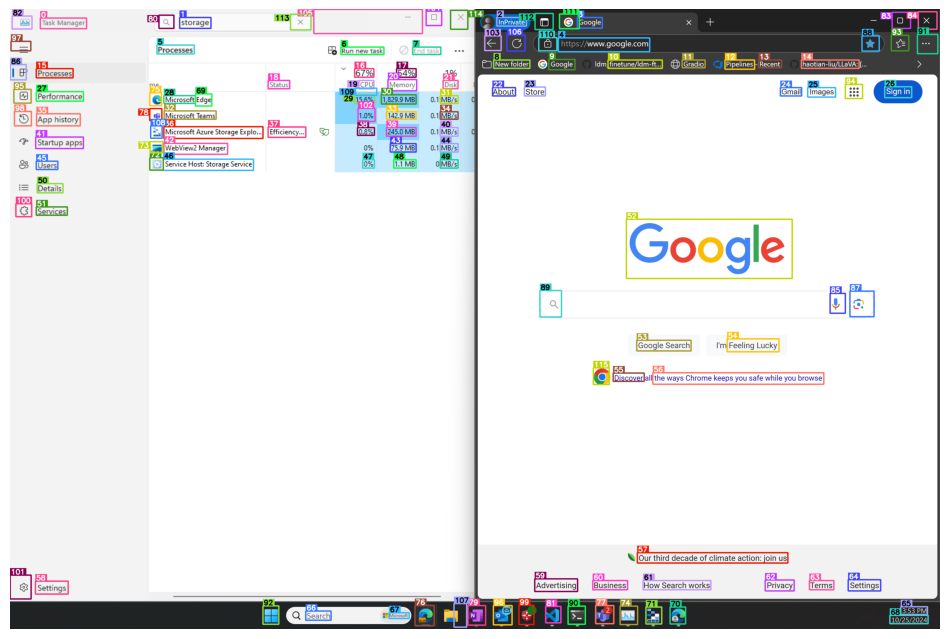

In [13]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(12,12))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)


In [7]:
# print(label_coordinates)
parsed_content_list

['Text Box ID 0: Task Manager',
 'Text Box ID 1: storage',
 'Text Box ID 2: InPrivate',
 'Text Box ID 3: Google',
 'Text Box ID 4: https:/ WWW.googlecom',
 'Text Box ID 5: Processes',
 'Text Box ID 6: Run new task',
 'Text Box ID 7: End task',
 'Text Box ID 8: New folder',
 'Text Box ID 9: Google',
 'Text Box ID 10: finetune/ldm-ft__',
 'Text Box ID 11: Gradio',
 'Text Box ID 12: Pipelines',
 'Text Box ID 13: Recent',
 'Text Box ID 14: haotian-liu/LLaVA:',
 'Text Box ID 15: Processes',
 'Text Box ID 16: 67%',
 'Text Box ID 17: 5496',
 'Text Box ID 18: Status',
 'Text Box ID 19: CPU',
 'Text Box ID 20: Memory',
 'Text Box ID 21: Disk',
 'Text Box ID 22: About',
 'Text Box ID 23: Store',
 'Text Box ID 24: Gmail',
 'Text Box ID 25: Images',
 'Text Box ID 26: Sign in',
 'Text Box ID 27: Performance',
 'Text Box ID 28: Microscft',
 'Text Box ID 29: 15.686',
 'Text Box ID 30: 1,829,9 MB',
 'Text Box ID 31: MBI:',
 'Text Box ID 32: Microscft Tean;',
 'Text Box ID 33: 142.9MB',
 'Text Box ID 3